In [ ]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans
import altair as alt #pacote para outros tipos de gráficos

In [ ]:
df = pd.read_csv('DataSet_Pizza.csv', index_col = 'brand')
df = df.drop(['id'], axis=1)
print(df)
X = df
R = X.corr()
l, e = np.linalg.eig(R)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]



        mois   prot    fat   ash  sodium   carb   cal
brand                                                
A      27.82  21.43  44.87  5.11    1.77   0.77  4.93
A      28.49  21.26  43.89  5.34    1.79   1.02  4.84
A      28.35  19.99  45.78  5.08    1.63   0.80  4.95
A      30.55  20.15  43.13  4.79    1.61   1.38  4.74
A      30.49  21.28  41.65  4.82    1.64   1.76  4.67
...      ...    ...    ...   ...     ...    ...   ...
J      44.91  11.07  17.00  2.49    0.66  25.36  2.91
J      43.15  11.79  18.46  2.43    0.67  24.17  3.10
J      44.55  11.01  16.03  2.43    0.64  25.98  2.92
J      47.60  10.43  15.18  2.32    0.56  24.47  2.76
J      46.84   9.91  15.50  2.27    0.57  25.48  2.81

[300 rows x 7 columns]


In [ ]:
X.describe()

,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


In [ ]:
X.corr()

,mois,prot,fat,ash,sodium,carb,cal
mois,1.000000,0.360248,-0.171318,0.265556,-0.102279,-0.591802,-0.764441
prot,0.360248,1.000000,0.498002,0.823844,0.429130,-0.853542,0.070258
fat,-0.171318,0.498002,1.000000,0.791634,0.933325,-0.640238,0.764567
ash,0.265556,0.823844,0.791634,1.000000,0.808122,-0.898988,0.326468
sodium,-0.102279,0.429130,0.933325,0.808122,1.000000,-0.620176,0.671958
carb,-0.591802,-0.853542,-0.640238,-0.898988,-0.620176,1.000000,-0.023485
cal,-0.764441,0.070258,0.764567,0.326468,0.671958,-0.023485,1.000000


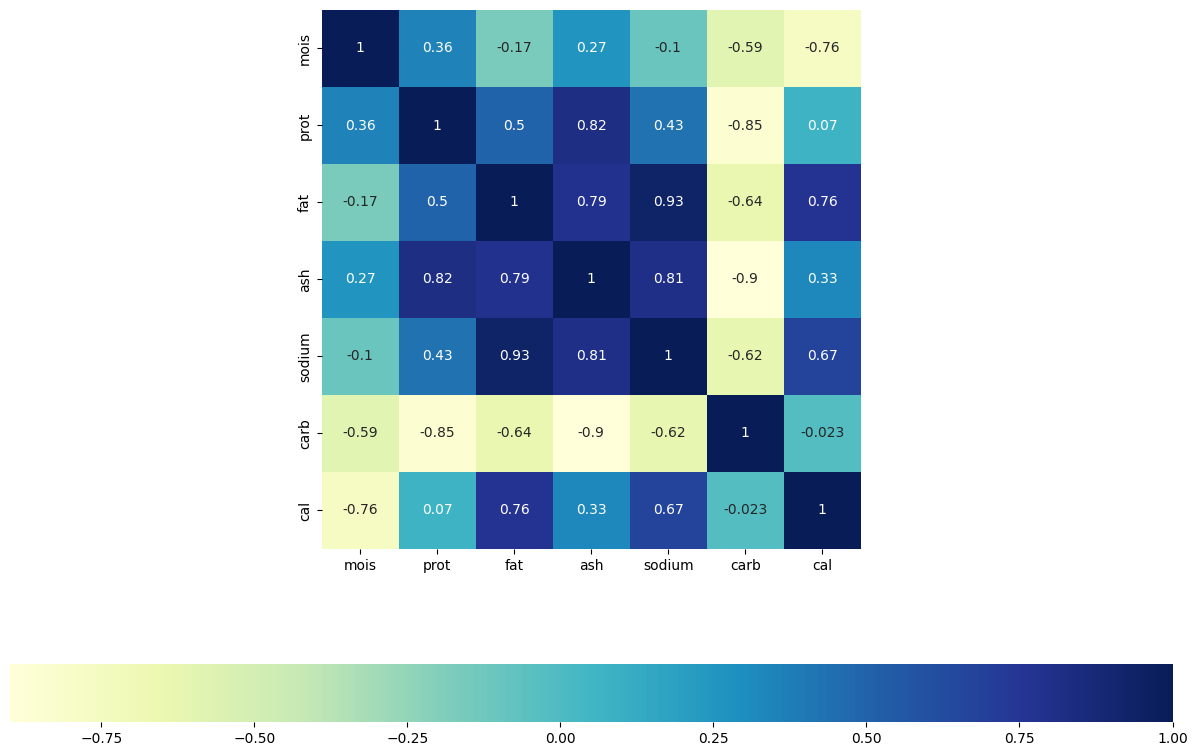

In [ ]:
plt.figure(figsize=(15,10))
ax = sb.heatmap(X.corr(),
                 annot=True,
                 cmap='YlGnBu',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [ ]:
pca = PCA()
resultado_pca = pca.fit_transform(scale(X))
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1], 'cp3':resultado_pca[:, 2], 'cp4':resultado_pca[:, 3]}, index=X.index)
print(resultado)

            cp1       cp2       cp3       cp4
brand                                        
A      5.010343  2.679215 -0.039327  0.144106
A      5.023755  2.529295 -0.097056  0.353950
A      4.805439  2.673700 -0.075475 -0.107798
A      4.469543  2.285029 -0.120233 -0.054028
A      4.471893  2.159152 -0.000738  0.117166
...         ...       ...       ...       ...
J     -0.535510 -0.530843 -0.426490  0.229258
J     -0.339636 -0.243230 -0.281174  0.064289
J     -0.646433 -0.515434 -0.370378  0.249294
J     -0.865078 -0.921790 -0.493755  0.127400
J     -0.895868 -0.767878 -0.530108  0.114224

[300 rows x 4 columns]


In [ ]:
pca.explained_variance_ratio_

array([5.95968842e-01, 3.27208198e-01, 5.92231918e-02, 1.35963182e-02,
       3.95385973e-03, 4.82299078e-05, 1.35982576e-06])

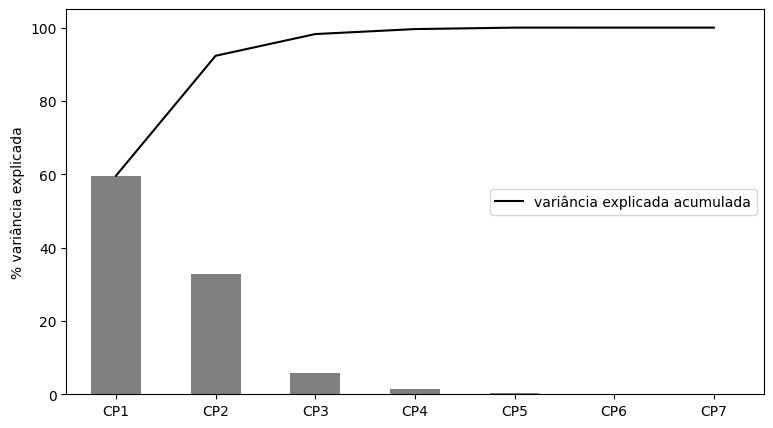

In [ ]:
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
# dataframe com as variâncias acumuladas para criar o scree plot
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
# scree plot com %
fig, ax = plt.subplots(figsize=(9,5))
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='center right',)
plt.ylabel('% variância explicada')
plt.xlabel('');

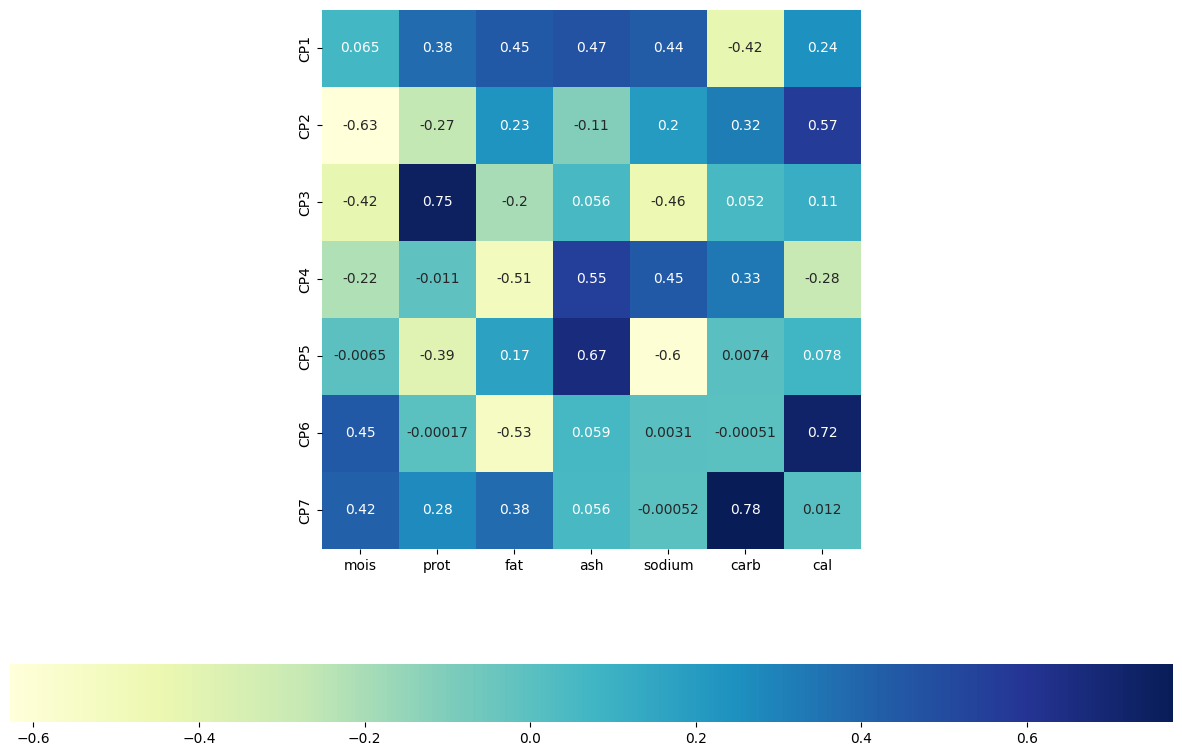

In [ ]:
plt.figure(figsize=(15,10))
ax = sb.heatmap(pca.components_,
                 annot=True,
                 cmap='YlGnBu',
                 yticklabels=[ "CP"+str(X) for X in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")


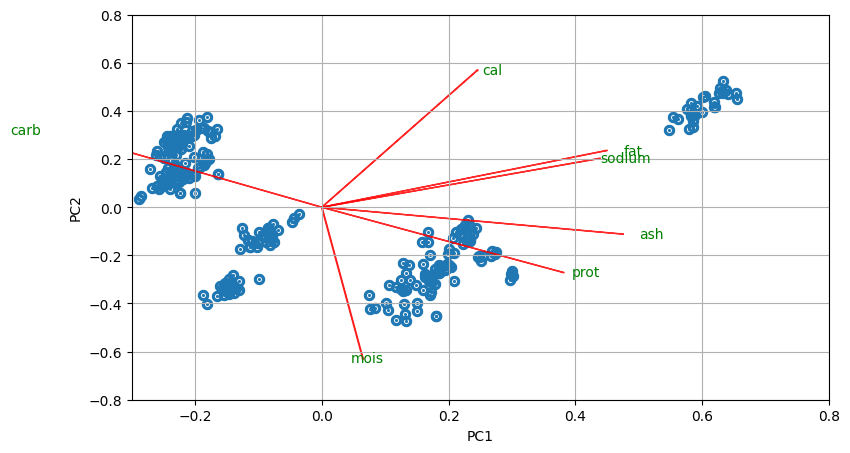

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley,s=5, linewidths = 6)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    ax.set(xlim=(-0.3, 0.8), ylim=(-0.8, 0.8))
    plt.grid()

myplot(resultado_pca[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

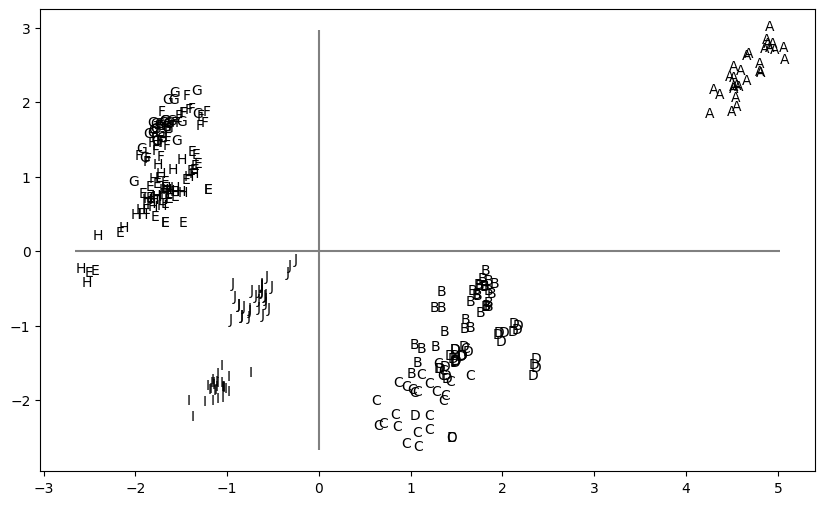

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray');

In [ ]:
Y = pd.read_csv('DataSet_Pizza.csv', index_col = 'id')
Y = Y.drop(['brand'], axis=1)
Z=linkage(Y,method='ward')
Z

array([[ 77.        , 118.        ,   0.        ,   2.        ],
       [270.        , 298.        ,   0.        ,   2.        ],
       [271.        , 299.        ,   0.        ,   2.        ],
       ...,
       [585.        , 595.        , 188.43485546, 119.        ],
       [593.        , 596.        , 234.56496409, 180.        ],
       [594.        , 597.        , 458.0121462 , 300.        ]])

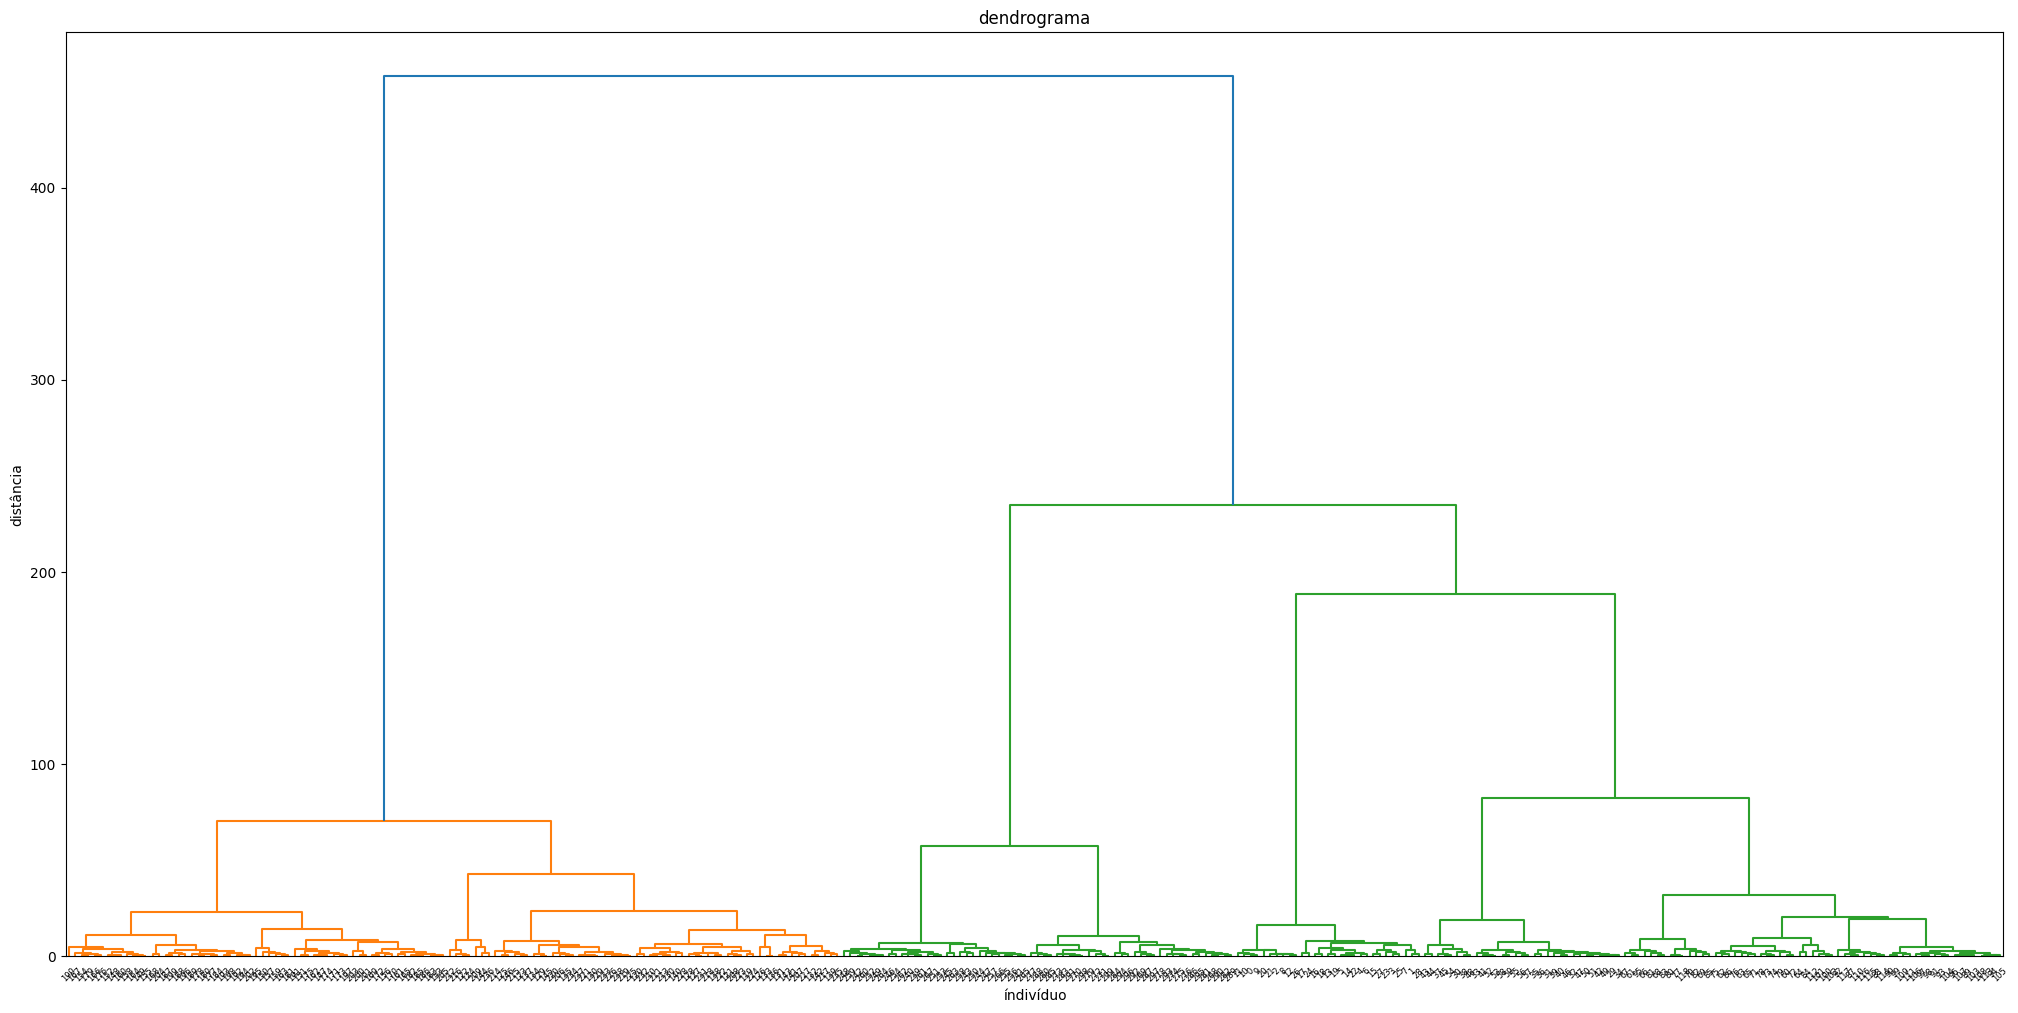

In [ ]:
plt.figure(figsize=(25,12))
plt.title('dendrograma')
plt.xlabel('índivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=45., #rotação do eixo
    leaf_font_size=6., #rotação da fonte
)
plt.show()

In [ ]:
a = list(Y.index)
a

[14069,
 14053,
 14025,
 14016,
 14005,
 14075,
 14082,
 14097,
 14117,
 14133,
 14101,
 14108,
 14164,
 14154,
 24005,
 24026,
 24094,
 24108,
 24102,
 24082,
 34017,
 34020,
 24136,
 24122,
 24115,
 34012,
 34006,
 24146,
 24138,
 14015,
 14006,
 14024,
 14052,
 14062,
 14047,
 14074,
 14083,
 14094,
 14124,
 24019,
 24012,
 14132,
 14146,
 14149,
 14161,
 14113,
 24008,
 24029,
 24045,
 24040,
 24093,
 24083,
 24049,
 24101,
 34011,
 24125,
 24145,
 24151,
 34005,
 24118,
 14058,
 14022,
 14036,
 14093,
 14080,
 14029,
 14106,
 14014,
 14073,
 14151,
 14162,
 14139,
 14115,
 24006,
 24020,
 24031,
 24038,
 24043,
 24152,
 24144,
 24135,
 24124,
 24113,
 24058,
 24091,
 34010,
 34003,
 14092,
 14081,
 14072,
 14116,
 14128,
 14107,
 14050,
 14013,
 14004,
 14003,
 14037,
 14023,
 14059,
 14163,
 14150,
 14140,
 24007,
 24021,
 24011,
 24030,
 34009,
 24039,
 24044,
 34004,
 24153,
 24143,
 24134,
 24123,
 24114,
 24084,
 24092,
 24043,
 14089,
 14056,
 14099,
 14033,
 14063,
 14029,


In [ ]:
max_d = 50

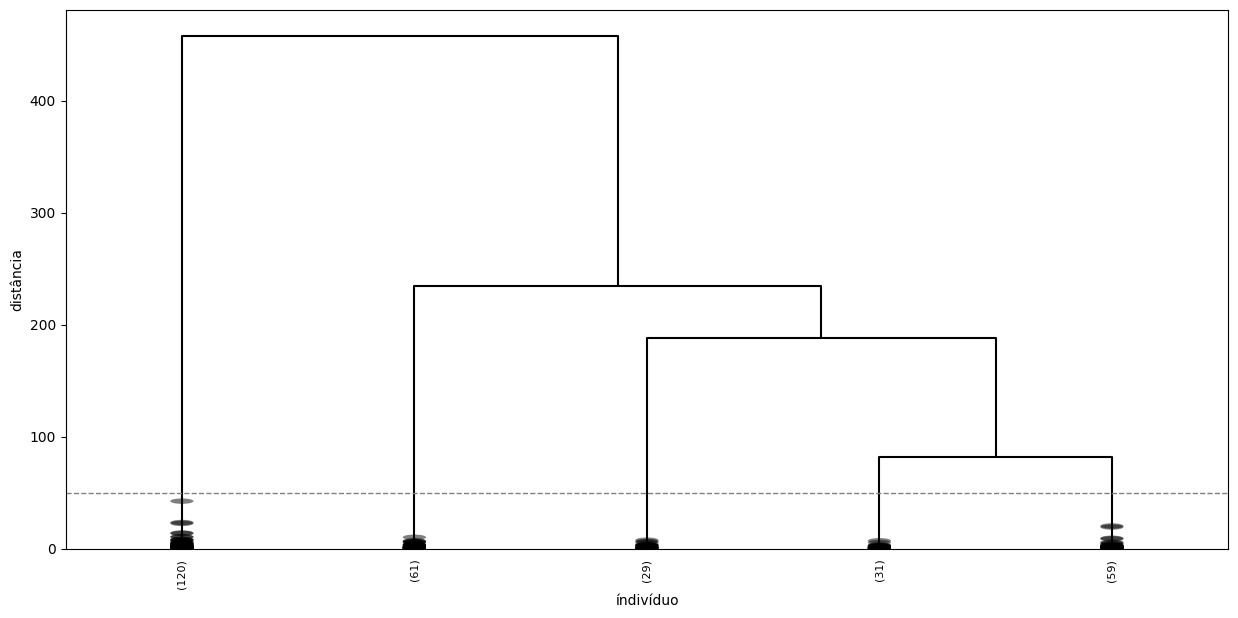

In [ ]:
fig, ax=plt.subplots(figsize=(15,7))
ax = dendrogram(
    Z,
    truncate_mode='lastp',
    p=5,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=Y.index,
    show_contracted=True,
    above_threshold_color='black',
    color_threshold=0.1,
)
plt.axhline(y=max_d,c='grey',lw=1,linestyle='dashed')
plt.xlabel('índivíduo')
plt.ylabel('distância');

In [ ]:
grupos=cut_tree(Z,height=max_d)
Y['grupo'] = grupos
Y
Y.groupby('grupo').mean() #media dos grupos com todas as variaveis

,mois,prot,fat,ash,sodium,carb,cal
grupo,,,,,,,
0,29.966207,20.107241,43.446897,5.014483,1.656207,1.486897,4.773793
1,51.307742,13.638710,27.620323,3.463548,0.984839,3.969677,3.190968
2,48.497797,23.967627,20.513051,3.843390,0.600508,3.179831,2.932712
3,35.943607,7.820328,14.669836,1.438197,0.431311,40.128689,3.238033
4,28.832542,8.064407,16.040847,1.460508,0.453051,45.595593,3.595593
5,54.592759,10.383103,13.060690,2.098276,0.487241,19.865517,2.384138
6,46.035000,10.566250,16.324063,2.364688,0.614375,24.735937,2.878437


In [ ]:
Y.groupby('grupo').median() #mediana dos grupos com todas as variaveis

,mois,prot,fat,ash,sodium,carb,cal
grupo,,,,,,,
0,30.43,20.150,43.420,4.970,1.65,1.39,4.77
1,50.87,13.700,28.380,3.550,1.00,3.93,3.23
2,48.05,22.950,20.830,4.020,0.60,2.64,2.95
3,35.74,7.810,15.050,1.420,0.43,39.66,3.27
4,28.66,8.060,15.710,1.450,0.45,45.90,3.59
5,54.52,10.400,13.090,2.080,0.48,19.88,2.40
6,46.13,10.455,16.185,2.345,0.61,24.70,2.88


In [ ]:
Y.groupby('grupo').std() #desvio padrao dos grupos

,mois,prot,fat,ash,sodium,carb,cal
grupo,,,,,,,
0,1.955413,1.079441,1.863102,0.204443,0.064665,0.619724,0.163629
1,1.728696,0.509913,2.182310,0.237817,0.098009,0.614456,0.171976
2,1.593092,2.306133,2.699869,0.672565,0.163026,1.762005,0.180132
3,1.556348,0.414528,3.825710,0.120561,0.032786,2.900611,0.235279
4,1.365446,0.265111,2.094132,0.096837,0.029376,1.890762,0.143278
5,0.979143,0.543120,0.919087,0.075691,0.023588,0.956122,0.072777
6,1.395033,0.643658,1.130172,0.096352,0.041109,1.055975,0.098737


In [ ]:
grupo0=Y.query('grupo==0').index

In [ ]:
grupo1=Y.query('grupo==1').index

In [ ]:
grupo2=Y.query('grupo==2').index

In [ ]:
pca=PCA()
resultado_pca=pca.fit_transform(scale(Y))
resultado=pd.DataFrame({'cp1':resultado_pca[:,0],'cp2':resultado_pca[:,1]})

In [ ]:
resultado['grupo']=grupos
resultado['obs']=resultado.index
resultado

,cp1,cp2,grupo,obs
0,5.390480,2.422530,0,0
1,5.396077,2.272090,0,1
2,5.201345,2.433650,0,2
3,4.875786,2.074610,0,3
4,4.873634,1.949809,0,4
...,...,...,...,...
295,-1.171761,-0.649680,6,295
296,-0.978218,-0.379039,6,296
297,-1.273285,-0.625293,6,297
298,-1.491330,-1.011370,6,298


In [ ]:
# gráficos
g=alt.Chart(resultado,height=500,width=500).mark_text().encode(
    alt.X('cp1',scale=alt.Scale(domain=[resultado.cp1.min(),resultado.cp1.max()])),
    alt.Y('cp2',scale=alt.Scale(domain=[resultado.cp2.min(),resultado.cp2.max()])),
    text='obs',
    color=alt.Color('grupo:Q', scale=alt.Scale(scheme='set1'))
)
# eixo x=0
bar_x=alt.Chart(resultado).mark_rule(color='gray').encode(
    x='mean(0):Q')

# eixo y=0
bar_y=alt.Chart(resultado).mark_rule(color='gray').encode(
    y='mean(0):Q')

g + bar_x + bar_y

alt.LayerChart(...)